In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./cannabis.csv')
data.head()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,good
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,low
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,good
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,good


In [3]:
data.Utility.unique()

array(['good', 'best', 'low', 'average', 'none'], dtype=object)

In [4]:
#Convert Multinomial to Binomial
data.Utility = [x if x == 'best' else 'other' for x in data.Utility]
data.head()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,other
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,other
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,other
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,other


In [5]:
#Summary of Statistics
data.describe()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
count,1458.000000,1470.000000,1470.000000,1284.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,2136.977366,75.865518,9.674565,62.059579,3.159520,2.966417,3.083208,3.282159,2.905547
std,648.661372,1614.500903,4.297192,32.247227,1.041356,0.838065,0.760061,0.778459,0.811572
min,1.000000,0.580000,1.000000,1.500000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,1595.000000,8.600000,6.145000,38.000000,2.500000,2.500000,3.000000,3.000000,2.500000
50%,2426.000000,15.000000,9.285000,66.000000,3.000000,3.000000,3.000000,3.300000,3.000000
75%,2656.000000,21.982500,12.300000,88.000000,4.000000,3.500000,3.700000,4.000000,3.300000
max,3537.000000,45452.000000,24.000000,108.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
#Identify how many classes we have
data.Utility.unique()

array(['other', 'best'], dtype=object)

Class Split
other    1262
best      210
Name: Utility, dtype: int64


Text(0, 0.5, 'Count')

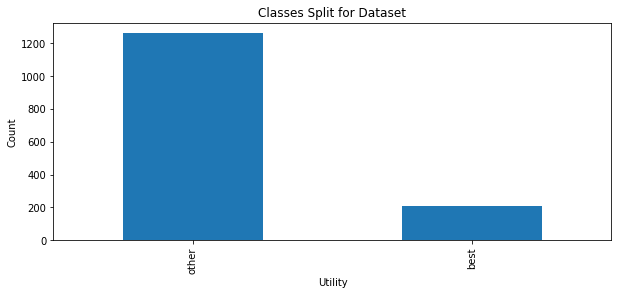

In [7]:
#Class Balance
print('Class Split')
print(data['Utility'].value_counts())
data['Utility'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Utility')
plt.ylabel('Count')

In [8]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
data1 = pp.ProfileReport(data)
data1.to_file('cannabis.html')
display(IFrame('cannabis.html', width=900, height=350))

In [9]:
#Summary of N/A Values
data.isnull().sum()

PMCno        14
DBH           2
Ht            2
Surv        188
Vig         138
Ins_res     138
Stem_Fm     138
Crown_Fm    138
Brnch_Fm    138
Utility       0
dtype: int64

In [10]:
#Drop rows that do not have a least 5 non-NaN values
data_new=data.dropna(thresh=5).reset_index(drop = True)
data_new

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.00,11.00,43.0,4.0,3.0,4.0,4.0,4.0,other
1,1606.0,14.00,10.00,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.00,7.00,54.0,2.0,3.0,3.0,4.0,3.0,other
3,1724.0,16.00,10.00,76.0,4.0,3.0,4.0,4.0,4.0,other
4,2255.0,16.00,12.00,97.0,4.0,3.0,4.0,3.0,3.0,other
5,1644.0,18.00,13.00,76.0,5.0,4.0,5.0,4.0,5.0,best
6,1643.0,15.00,11.00,86.0,4.0,2.0,3.0,3.0,3.0,other
7,1645.0,21.00,12.00,108.0,5.0,5.0,4.0,4.0,2.0,best
8,1646.0,8.00,7.00,86.0,3.0,3.0,4.0,4.0,4.0,other
9,1647.0,16.00,10.00,54.0,4.0,4.0,4.0,3.0,3.0,other


In [11]:
#Summary of N/A Values
data_new.isnull().sum()

PMCno        2
DBH          2
Ht           2
Surv        50
Vig          0
Ins_res      0
Stem_Fm      0
Crown_Fm     0
Brnch_Fm     0
Utility      0
dtype: int64

In [12]:
#Replace NA with Mean, inplace=True means that the changes are saved to the df right away
data_new["PMCno"].fillna(data_new["PMCno"].mean(), inplace=True)
data_new["DBH"].fillna(data_new["DBH"].mean(), inplace=True)
data_new["Ht"].fillna(data_new["Ht"].mean(), inplace=True)
data_new["Surv"].fillna(data_new["Surv"].mean(), inplace=True)
data_new.reset_index(drop = True)

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.000000,20.00,11.00,43.0,4.0,3.0,4.0,4.0,4.0,other
1,1606.000000,14.00,10.00,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.000000,11.00,7.00,54.0,2.0,3.0,3.0,4.0,3.0,other
3,1724.000000,16.00,10.00,76.0,4.0,3.0,4.0,4.0,4.0,other
4,2255.000000,16.00,12.00,97.0,4.0,3.0,4.0,3.0,3.0,other
5,1644.000000,18.00,13.00,76.0,5.0,4.0,5.0,4.0,5.0,best
6,1643.000000,15.00,11.00,86.0,4.0,2.0,3.0,3.0,3.0,other
7,1645.000000,21.00,12.00,108.0,5.0,5.0,4.0,4.0,2.0,best
8,1646.000000,8.00,7.00,86.0,3.0,3.0,4.0,4.0,4.0,other
9,1647.000000,16.00,10.00,54.0,4.0,4.0,4.0,3.0,3.0,other


In [13]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
data2 = pp.ProfileReport(data_new)
data2.to_file('cannabis_clean.html')
display(IFrame('cannabis_clean.html', width=900, height=350))

In [14]:
#Automatic Class Labeling
Utility_mapping ={label:idx for idx, label in enumerate(np.unique(data_new['Utility']))}
data_new['Utility'] = data_new['Utility'].map(Utility_mapping)
data_new

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.000000,20.00,11.00,43.0,4.0,3.0,4.0,4.0,4.0,1
1,1606.000000,14.00,10.00,97.0,5.0,4.0,4.0,4.0,3.0,0
2,1471.000000,11.00,7.00,54.0,2.0,3.0,3.0,4.0,3.0,1
3,1724.000000,16.00,10.00,76.0,4.0,3.0,4.0,4.0,4.0,1
4,2255.000000,16.00,12.00,97.0,4.0,3.0,4.0,3.0,3.0,1
5,1644.000000,18.00,13.00,76.0,5.0,4.0,5.0,4.0,5.0,0
6,1643.000000,15.00,11.00,86.0,4.0,2.0,3.0,3.0,3.0,1
7,1645.000000,21.00,12.00,108.0,5.0,5.0,4.0,4.0,2.0,0
8,1646.000000,8.00,7.00,86.0,3.0,3.0,4.0,4.0,4.0,1
9,1647.000000,16.00,10.00,54.0,4.0,4.0,4.0,3.0,3.0,1


In [15]:
# Review Correlation between Variables
data_new.corr()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
PMCno,1.000000,-0.025098,0.202397,-0.082943,0.116795,0.145811,0.138647,0.158886,0.123583,-0.045302
DBH,-0.025098,1.000000,0.075956,-0.025995,0.032756,0.047826,0.001438,0.019105,-0.010575,-0.091119
Ht,0.202397,0.075956,1.000000,-0.112896,0.588007,0.379291,0.324832,0.191544,-0.035467,-0.305657
Surv,-0.082943,-0.025995,-0.112896,1.000000,0.206347,-0.144798,0.046358,0.044273,0.112044,-0.148154
Vig,0.116795,0.032756,0.588007,0.206347,1.000000,0.515951,0.353698,0.172327,-0.042581,-0.436983
Ins_res,0.145811,0.047826,0.379291,-0.144798,0.515951,1.000000,0.264880,0.228726,0.050526,-0.217813
Stem_Fm,0.138647,0.001438,0.324832,0.046358,0.353698,0.264880,1.000000,0.711281,0.562083,-0.304572
Crown_Fm,0.158886,0.019105,0.191544,0.044273,0.172327,0.228726,0.711281,1.000000,0.678071,-0.252726
Brnch_Fm,0.123583,-0.010575,-0.035467,0.112044,-0.042581,0.050526,0.562083,0.678071,1.000000,-0.142168
Utility,-0.045302,-0.091119,-0.305657,-0.148154,-0.436983,-0.217813,-0.304572,-0.252726,-0.142168,1.000000


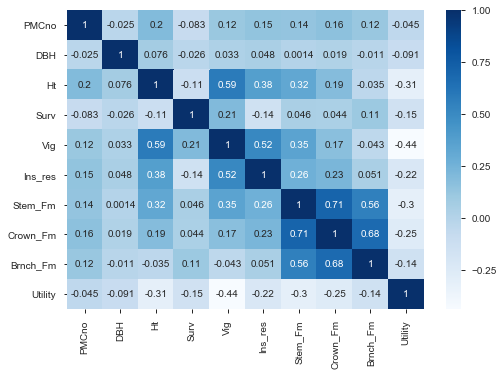

In [16]:
# Visualiztion of Correlations
sns.heatmap(data_new.corr(),annot=True,cmap="Blues")

Class Split
1    1124
0     210
Name: Utility, dtype: int64


Text(0, 0.5, 'Count')

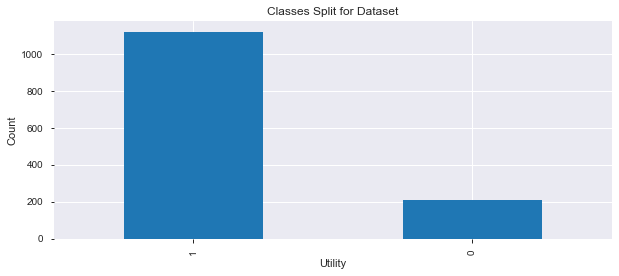

In [17]:
#Class Balance
print('Class Split')
print(data_new['Utility'].value_counts())
data_new['Utility'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Utility')
plt.ylabel('Count')

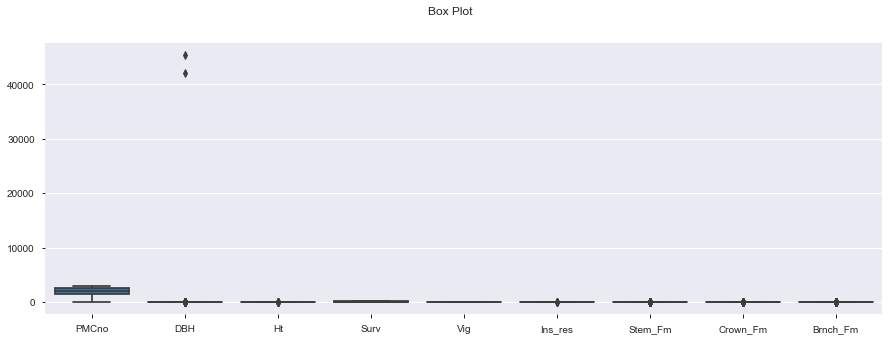

In [18]:
#Boxplot of Features, to detect outliers
fig = plt.figure(figsize=(15,5))
fig.suptitle('Box Plot')
ax = fig.add_subplot(111)
sns.boxplot(data=data_new.drop('Utility',axis=1))
plt.show()

In [19]:
#Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(data_new.drop('Utility', axis=1),0,list(data_new.drop('Utility', axis=1)))
data_new.drop('Utility', axis=1).loc[Outliers_to_drop]

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
41,1644.0,43.000000,15.000000,62.059579,5.0,4.0,4.0,3.0,2.0
52,1645.0,43.000000,11.000000,62.059579,4.0,5.0,3.0,3.0,1.0
70,1606.0,41.000000,14.000000,11.000000,5.0,4.0,2.0,2.0,1.0
201,1265.0,81.052096,9.514955,62.059579,3.0,2.0,1.0,1.0,1.0
287,2620.0,58.000000,5.000000,108.000000,3.0,4.0,3.0,3.0,3.0
333,2752.0,44.000000,18.000000,54.000000,4.0,3.0,2.0,2.0,2.0
371,2752.0,45.000000,16.000000,27.000000,3.0,3.0,2.0,2.0,1.0
375,2773.0,52.000000,20.000000,14.000000,4.0,3.0,2.0,2.0,2.0
574,1719.0,47.000000,19.000000,22.000000,5.0,5.0,4.0,4.0,3.0
579,1601.0,41.000000,18.000000,11.000000,4.0,4.0,4.0,4.0,4.0


In [20]:
#Create New Dataset without Outliers
clean_data=data_new.drop(data_new.index[Outliers_to_drop]).reset_index(drop = True)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 10 columns):
PMCno       1176 non-null float64
DBH         1176 non-null float64
Ht          1176 non-null float64
Surv        1176 non-null float64
Vig         1176 non-null float64
Ins_res     1176 non-null float64
Stem_Fm     1176 non-null float64
Crown_Fm    1176 non-null float64
Brnch_Fm    1176 non-null float64
Utility     1176 non-null int64
dtypes: float64(9), int64(1)
memory usage: 92.0 KB


Class Split
1    1010
0     166
Name: Utility, dtype: int64


Text(0, 0.5, 'Count')

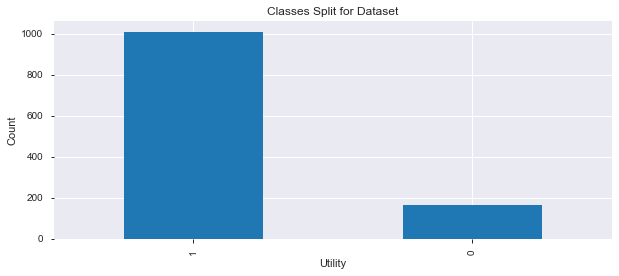

In [21]:
#Class Balance
print('Class Split')
print(clean_data['Utility'].value_counts())
clean_data['Utility'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Utility')
plt.ylabel('Count')

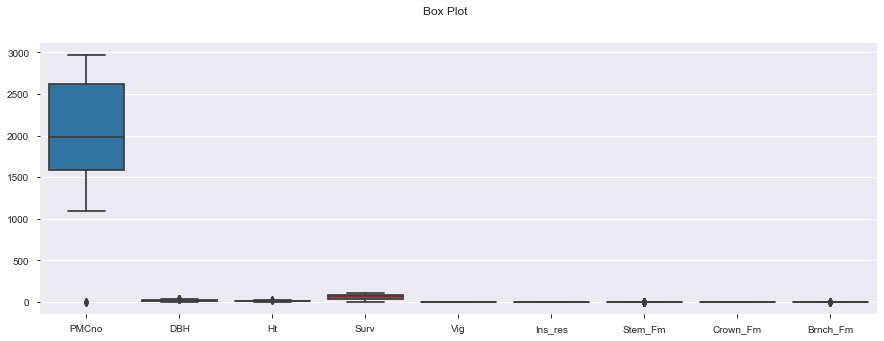

In [22]:
#Boxplot of Features, after outler Removal
fig = plt.figure(figsize=(15,5))
fig.suptitle('Box Plot')
ax = fig.add_subplot(111)
sns.boxplot(data=clean_data.drop('Utility',axis=1))
plt.show()

In [23]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
data2 = pp.ProfileReport(clean_data)
data2.to_file('cannabis_clean.html')
display(IFrame('cannabis_clean.html', width=900, height=350))

In [25]:
clean_data.to_csv (r'C:\Users\rosha\OneDrive\Documents\PythonData1200\cannabis_clean.csv', index = False, header=True)